# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [101]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

In [3]:
print(cities)

['kholodnyy', 'ushuaia', 'puerto ayora', 'ngukurr', 'conceicao do araguaia', 'aswan', 'hobart', 'kruisfontein', 'nikolskoye', 'ahipara', 'edeia', 'gornopravdinsk', 'saskylakh', 'belushya guba', 'punta arenas', 'hithadhoo', 'sao filipe', 'cascais', 'jamestown', 'rikitea', 'lebu', 'yazoo city', 'torbay', 'tumannyy', 'gari', 'bluff', 'hermanus', 'codrington', 'faya', 'jiuquan', 'bilibino', 'touros', 'miraflores', 'cubara', 'bengkulu', 'bredasdorp', 'talnakh', 'pevek', 'leningradskiy', 'tiksi', 'narsaq', 'khatanga', 'barrow', 'tura', 'bur gabo', 'mogadishu', 'busselton', 'nizhniy kuranakh', 'astara', 'port alfred', 'muravlenko', 'santa cruz de la palma', 'tawkar', 'huilong', 'norman wells', 'hualmay', 'ruatoria', 'taolanaro', 'albany', 'quatre cocos', 'port hardy', 'pisco', 'bria', 'tasiilaq', 'dalby', 'thompson', 'mulatupo', 'balabac', 'illoqqortoormiut', 'yellowknife', 'batemans bay', 'lincoln', 'amderma', 'barhi', 'naftah', 'kaitangata', 'lorengau', 'muros', 'riyadh', 'attawapiskat', 's

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
# base_url = "http://api.openweathermap.org/data/2.5/weather?q="
# city = "kholodnyy"
# query_url = base_url + city + "&appid=" + weather_api_key

In [67]:
city_weather_dict = {
    "cities" : cities
}
city_weather_df = pd.DataFrame(city_weather_dict)
city_weather_df.head()

,cities
0,kholodnyy
1,ushuaia
2,puerto ayora
3,ngukurr
4,conceicao do araguaia


In [68]:
city_weather_df['city_number'] = None
city_weather_df['city name'] = None
city_weather_df['weather_check'] = None
city_weather_df['country'] = None
city_weather_df['date'] = None
city_weather_df['humidity'] = None
city_weather_df['lat'] = None
city_weather_df['lon'] = None
city_weather_df['wind_speed'] = None
city_weather_df['clouds'] = None
city_weather_df.head()

,cities,city_number,city name,weather_check,country,date,humidity,lat,lon,wind_speed,clouds
0,kholodnyy,None,None,None,None,None,None,None,None,None,None
1,ushuaia,None,None,None,None,None,None,None,None,None,None
2,puerto ayora,None,None,None,None,None,None,None,None,None,None
3,ngukurr,None,None,None,None,None,None,None,None,None,None
4,conceicao do araguaia,None,None,None,None,None,None,None,None,None,None


In [14]:
weather_response = requests.get(query_url)
weather = weather_response.json()
pprint(weather)


{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 62.72, 'lon': 147.95},
 'dt': 1587173969,
 'id': 2124611,
 'main': {'feels_like': 249.89,
          'grnd_level': 947,
          'humidity': 77,
          'pressure': 1029,
          'sea_level': 1029,
          'temp': 257.39,
          'temp_max': 257.39,
          'temp_min': 257.39},
 'name': 'Kholodnyy',
 'sys': {'country': 'RU', 'sunrise': 1587148327, 'sunset': 1587202954},
 'timezone': 39600,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 70, 'speed': 5.65}}


In [69]:

for i, row in city_weather_df.iterrows():
    base_url = "http://api.openweathermap.org/data/2.5/weather?q="
    city = row['cities']
    weather_data = requests.get(base_url + city + "&appid=" + weather_api_key + "&units=metric").json()
    try:
        print(f"Gathering weather data for {row['cities']}")
        weather = weather_data['main']['temp_max']
        city_number = weather_data['id']
        name = weather_data['name']
        country = weather_data['sys']['country']
        date = weather_data['dt']
        humidity = weather_data['main']['humidity']
        lat = weather_data['coord']['lat']
        lon = weather_data['coord']['lon']
        wind_speed = weather_data['wind']['speed']
        clouds = weather_data['clouds']['all']
        city_weather_df.loc[i, 'weather_check'] = weather
        city_weather_df.loc[i, 'city_number'] = city_number
        city_weather_df.loc[i, 'city name'] = name
        city_weather_df.loc[i, 'country'] = country
        city_weather_df.loc[i, 'date'] = date
        city_weather_df.loc[i, 'humidity'] = humidity
        city_weather_df.loc[i, 'lat'] = lat
        city_weather_df.loc[i, 'lon'] = lon
        city_weather_df.loc[i, 'wind_speed'] = wind_speed
        city_weather_df.loc[i, 'clouds'] = clouds
    except (KeyError):
        print(f"could not find weather data for {row['cities']}, skipping")

ing weather data for qaanaaq
Gathering weather data for bolonchen
could not find weather data for bolonchen, skipping
Gathering weather data for adrar
Gathering weather data for lazaro cardenas
Gathering weather data for barentsburg
could not find weather data for barentsburg, skipping
Gathering weather data for chuy
Gathering weather data for las guacamayas
Gathering weather data for aykhal
Gathering weather data for ranong
Gathering weather data for abha
Gathering weather data for cabo san lucas
Gathering weather data for dubbo
Gathering weather data for erzin
Gathering weather data for vao
Gathering weather data for komsomolskiy
Gathering weather data for gibraleon
Gathering weather data for esperance
Gathering weather data for parabel
Gathering weather data for huarmey
Gathering weather data for mercedes
Gathering weather data for fortuna
Gathering weather data for waipawa
Gathering weather data for mnogovershinnyy
Gathering weather data for port elizabeth
Gathering weather data fo

In [70]:
city_weather_df.head()

,cities,city_number,city name,weather_check,country,date,humidity,lat,lon,wind_speed,clouds
0,kholodnyy,2124611,Kholodnyy,-24.79,RU,1587230590,76,62.72,147.95,2.13,98
1,ushuaia,3833367,Ushuaia,12,AR,1587230351,32,-54.8,-68.3,5.7,40
2,puerto ayora,3652764,Puerto Ayora,29,EC,1587230538,74,-0.74,-90.35,6.2,40
3,ngukurr,None,None,None,None,None,None,None,None,None,None
4,conceicao do araguaia,3401845,Conceição do Araguaia,28.13,BR,1587230591,81,-8.26,-49.26,1.54,76


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | severo-kurilsk
Processing Record 2 of Set 1 | darhan
Processing Record 3 of Set 1 | tarakan
Processing Record 4 of Set 1 | komsomolskiy
Processing Record 5 of Set 1 | souillac
Processing Record 6 of Set 1 | jiuquan
Processing Record 7 of Set 1 | sesheke
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | clarence town
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | magadan
Processing Record 12 of Set 1 | salym
Processing Record 13 of Set 1 | carnarvon
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | arys
Processing Record 16 of Set 1 | prince rupert
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | rio gallegos
Processing Record 22 of Set 1 | kropotkin
Processing Record 23 of Set 1 | but

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [76]:
city_copy_df_2 = city_weather_df

In [77]:
city_copy_df_2.head()

,cities,city_number,city name,weather_check,country,date,humidity,lat,lon,wind_speed,clouds
0,kholodnyy,2124611,Kholodnyy,-24.79,RU,1587230590,76,62.72,147.95,2.13,98
1,ushuaia,3833367,Ushuaia,12,AR,1587230351,32,-54.8,-68.3,5.7,40
2,puerto ayora,3652764,Puerto Ayora,29,EC,1587230538,74,-0.74,-90.35,6.2,40
4,conceicao do araguaia,3401845,Conceição do Araguaia,28.13,BR,1587230591,81,-8.26,-49.26,1.54,76
5,aswan,359792,Aswān,28,EG,1587230591,21,24.09,32.91,2.1,69


In [78]:
city_copy_df_2 = city_copy_df_2.dropna(how='any',axis=0,inplace=False)

In [79]:
city_copy_df_2

,cities,city_number,city name,weather_check,country,date,humidity,lat,lon,wind_speed,clouds
0,kholodnyy,2124611,Kholodnyy,-24.79,RU,1587230590,76,62.72,147.95,2.13,98
1,ushuaia,3833367,Ushuaia,12,AR,1587230351,32,-54.8,-68.3,5.7,40
2,puerto ayora,3652764,Puerto Ayora,29,EC,1587230538,74,-0.74,-90.35,6.2,40
4,conceicao do araguaia,3401845,Conceição do Araguaia,28.13,BR,1587230591,81,-8.26,-49.26,1.54,76
5,aswan,359792,Aswān,28,EG,1587230591,21,24.09,32.91,2.1,69
...,...,...,...,...,...,...,...,...,...,...,...
629,dustlik,1514125,Dustlik,17.47,UZ,1587230653,42,40.52,68.04,2.74,12
630,roma,5134295,Rome,6.11,US,1587230479,56,43.21,-75.46,3.6,90
632,ocampo,3994535,Ocampo,24.72,MX,1587230653,14,21.65,-101.5,1.79,63
633,carthage,2468245,Carthage,20,TN,1587230653,82,36.86,10.33,5.1,20


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,severo-kurilsk,92,RU,1534988024,93,50.68,156.12,54.27,2.73
1,darhan,8,MN,1534988024,71,49.49,105.92,72.81,8.55
2,tarakan,48,ID,1534988024,100,3.30,117.63,80.10,4.41
3,komsomolskiy,48,RU,1534987754,72,67.55,63.78,54.46,15.46
4,souillac,0,FR,1534986000,73,45.60,-0.60,71.60,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [129]:
city_copy_df_2.head()
city_copy_df_2.to_csv("WeatherPy.csv")

#### Latitude vs. Temperature Plot

Text(0.5, 1.0, 'City Latitude vs. Max Temperature(C) (04/17/20)')

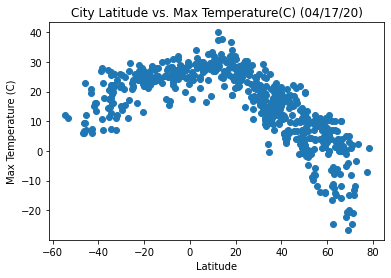

In [81]:
#my lat vs. temp plot
#code is creating a scatter plot and comparing temperature to latitude 
plt.scatter(city_copy_df_2['lat'],city_copy_df_2['weather_check'])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature(C) (04/17/20)")

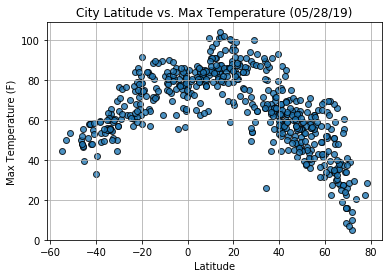

Text(0.5, 1.0, 'City Latitude vs. humidity (04/17/20)')

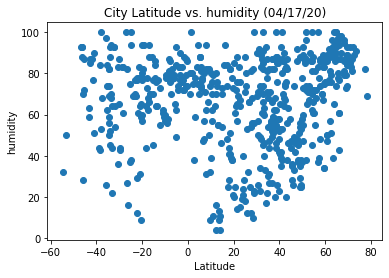

In [83]:
plt.scatter(city_copy_df_2['lat'],city_copy_df_2['humidity'])
plt.xlabel("Latitude")
plt.ylabel("humidity")
plt.title("City Latitude vs. humidity (04/17/20)")
#code is creating a scatter and analyzing humidity vs. latitude

#### Latitude vs. Humidity Plot

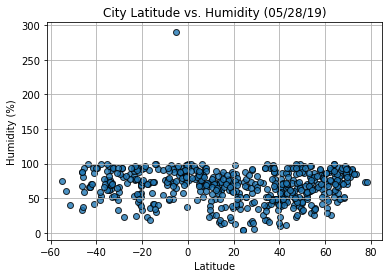

#### Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Latitude vs. cloudiness(%) (04/17/20)')

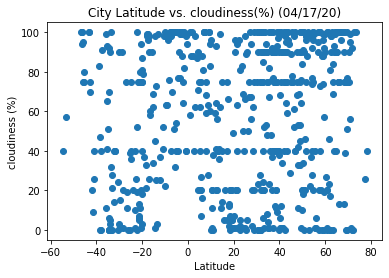

In [86]:
plt.scatter(city_copy_df_2['lat'],city_copy_df_2['clouds'])
plt.xlabel("Latitude")
plt.ylabel("cloudiness (%)")
plt.title("City Latitude vs. cloudiness(%) (04/17/20)")
#code is making a scatter plot analyzing cloudiness vs. latitude

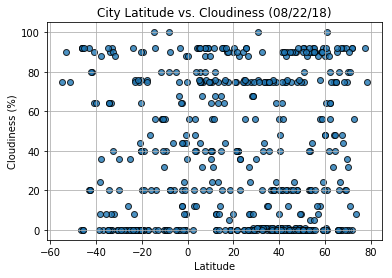

#### Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'City Latitude vs. Wind Speed (04/17/20)')

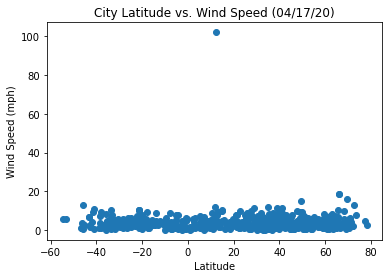

In [87]:
plt.scatter(city_copy_df_2['lat'],city_copy_df_2['wind_speed'])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (04/17/20)")
#creating a scatter plot analyzing latitude vs. wind speed 

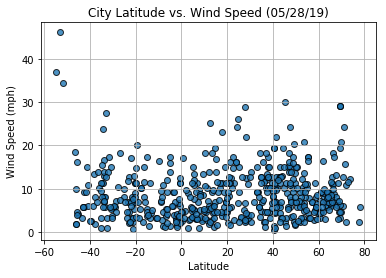

## Linear Regression

In [95]:
# OPTIONAL: Create a function to create Linear Regression plots


TypeError: can't multiply sequence by non-int of type 'numpy.float64'

In [88]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = city_copy_df_2.loc[city_copy_df_2['lat'] > 0]

In [89]:
northern_df.head()

,cities,city_number,city name,weather_check,country,date,humidity,lat,lon,wind_speed,clouds
0,kholodnyy,2124611,Kholodnyy,-24.79,RU,1587230590,76,62.72,147.95,2.13,98
5,aswan,359792,Aswān,28,EG,1587230591,21,24.09,32.91,2.1,69
8,nikolskoye,546105,Nikolskoye,3,RU,1587230425,86,59.7,30.79,7,90
11,gornopravdinsk,1506268,Gornopravdinsk,7.77,RU,1587230592,76,60.05,69.9,5.02,99
12,saskylakh,2017155,Saskylakh,-13.06,RU,1587230592,81,71.92,114.08,2.26,0


In [90]:
southern_df = city_copy_df_2.loc[city_copy_df_2['lat'] < 0]
southern_df.head()

,cities,city_number,city name,weather_check,country,date,humidity,lat,lon,wind_speed,clouds
1,ushuaia,3833367,Ushuaia,12,AR,1587230351,32,-54.8,-68.3,5.7,40
2,puerto ayora,3652764,Puerto Ayora,29,EC,1587230538,74,-0.74,-90.35,6.2,40
4,conceicao do araguaia,3401845,Conceição do Araguaia,28.13,BR,1587230591,81,-8.26,-49.26,1.54,76
6,hobart,2163355,Hobart,7.22,AU,1587230393,87,-42.88,147.33,2.5,75
7,kruisfontein,986717,Kruisfontein,19.21,ZA,1587230591,52,-34,24.73,3.92,0


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(20, -10, 'y = -0.57x + 35.36')

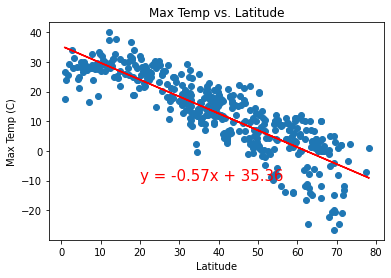

In [115]:
plt.scatter(northern_df['lat'],northern_df['weather_check'])
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title("Max Temp vs. Latitude")
x_values = northern_df['lat']
y_values = northern_df['weather_check']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values, 'r-')
plt.annotate(line_eq,(20, -10),fontsize=15,color='r')

The r-squared is: -0.8151657406810827


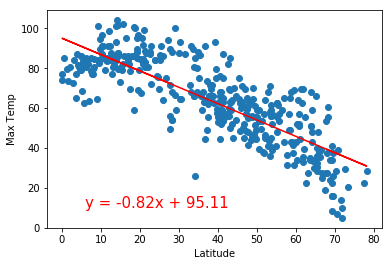

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(-10, 10, 'y = 0.31x + 29.11')

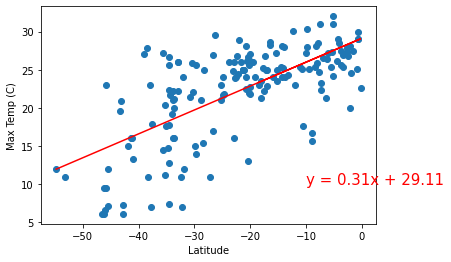

In [118]:
plt.scatter(southern_df['lat'],southern_df['weather_check'])
plt.ylabel("Max Temp (C)")
plt.xlabel("Latitude")
x_values = southern_df['lat']
y_values = southern_df['weather_check']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values, 'r-')
plt.annotate(line_eq,(-10, 10),fontsize=15,color='r')

The r-squared is: 0.760263355051646


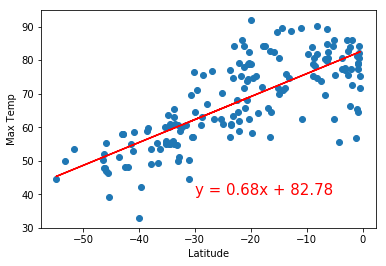

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(20, 10, 'y = 0.33x + 51.7')

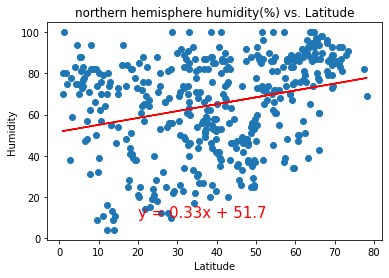

In [121]:
plt.scatter(northern_df['lat'],northern_df['humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("northern hemisphere humidity(%) vs. Latitude")
x_values = northern_df['lat']
y_values = northern_df['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values, 'r-')
plt.annotate(line_eq,(20, 10),fontsize=15,color='r')



The r-squared is: 0.10358336015746494


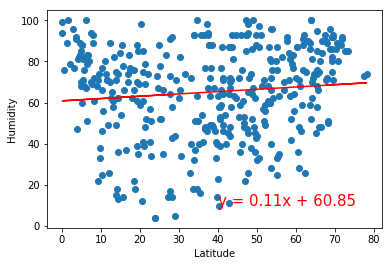

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(-10, 10, 'y = 0.2x + 74.73')

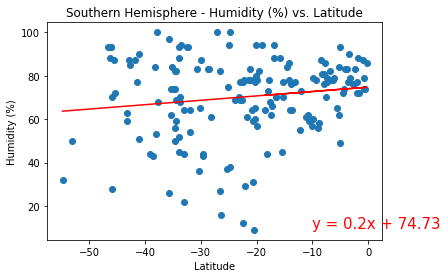

In [122]:
plt.scatter(southern_df['lat'],southern_df['humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
x_values = southern_df['lat']
y_values = southern_df['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values, 'r-')
plt.annotate(line_eq,(-10, 10),fontsize=15,color='r')

The r-squared is: 0.14689473425583055


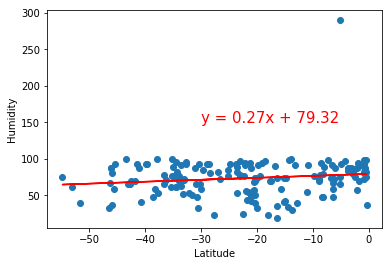

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(10, 10, 'y = 0.31x + 45.0')

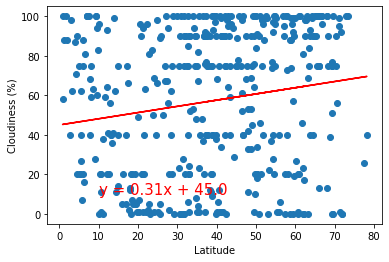

In [125]:
plt.scatter(northern_df['lat'],northern_df['clouds'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
x_values = northern_df['lat']
y_values = northern_df['clouds']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values, 'r-')
plt.annotate(line_eq,(10, 10),fontsize=15,color='r')

The r-squared is: -0.08733547918934018


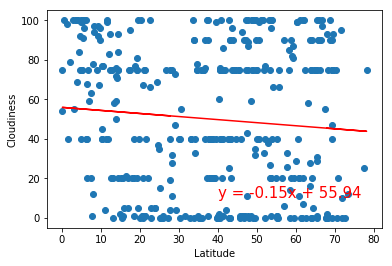

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(-10, 10, 'y = 0.74x + 71.42')

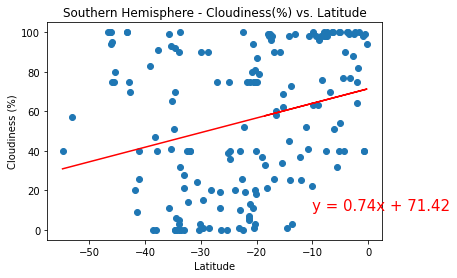

In [126]:
plt.scatter(southern_df['lat'],southern_df['clouds'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness(%) vs. Latitude")
x_values = southern_df['lat']
y_values = southern_df['clouds']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values, 'r-')
plt.annotate(line_eq,(-10, 10),fontsize=15,color='r')

The r-squared is: 0.21881426893991618


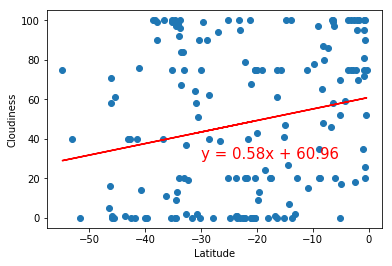

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(-10, 10, 'y = -0.01x + 4.36')

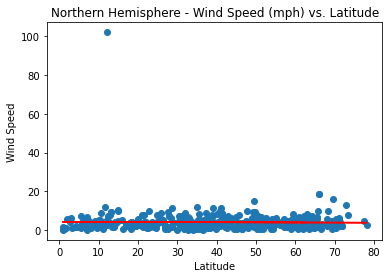

In [127]:
plt.scatter(northern_df['lat'],northern_df['wind_speed'])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
x_values = northern_df['lat']
y_values = northern_df['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values, 'r-')
plt.annotate(line_eq,(-10, 10),fontsize=15,color='r')

The r-squared is: 0.1071382774388479


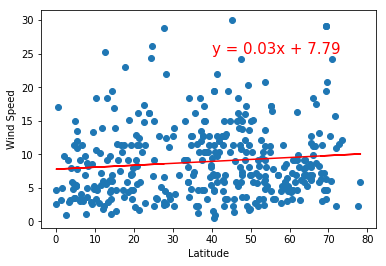

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(-10, 10, 'y = -0.03x + 3.09')

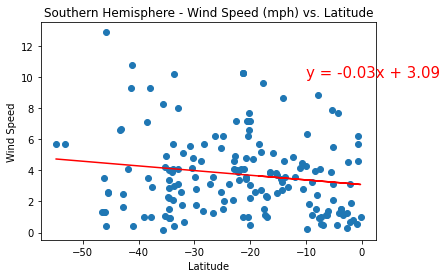

In [128]:
plt.scatter(southern_df['lat'],southern_df['wind_speed'])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
x_values = southern_df['lat']
y_values = southern_df['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values, 'r-')
plt.annotate(line_eq,(-10, 10),fontsize=15,color='r')

The r-squared is: -0.322483077139538


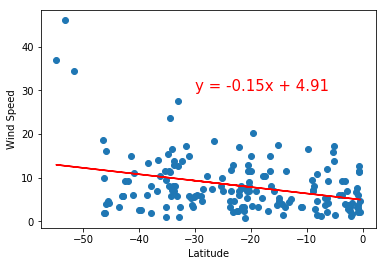